# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

### Reading the data into a pandas DataFrame and exploring

In [16]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [17]:
len(crops)

2200

In [18]:
print(crops.head())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice


In [19]:
print(crops["crop"].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [20]:
print(crops.isna().sum().sort_values())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


### Splitting the data

In [21]:
X = crops[["N", "P", "K", "ph"]]
y = crops["crop"].values
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>
(2200, 4) (2200,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predict the crop using each feature

In [23]:
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    feature_performance = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {feature_performance}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


Estimating feature correlation

<AxesSubplot: >

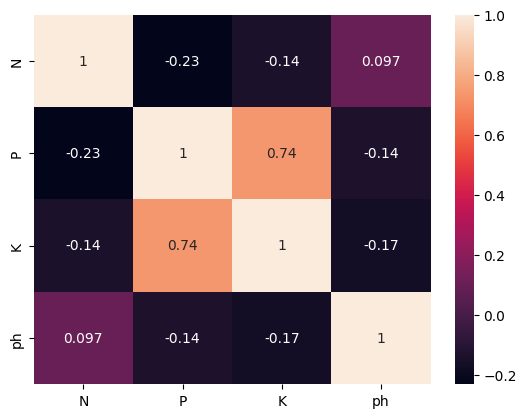

In [24]:
sns.heatmap(crops.corr(), annot=True)

### Producing a final model

In [54]:
final_features = ["N", "K", "P","ph"]
X = crops[final_features ]
y = crops["crop"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
log_reg = LogisticRegression(max_iter=2000, multi_class="multinomial")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")
print(f"F1-score: {model_performance}")

F1-score: 0.6679851635401781


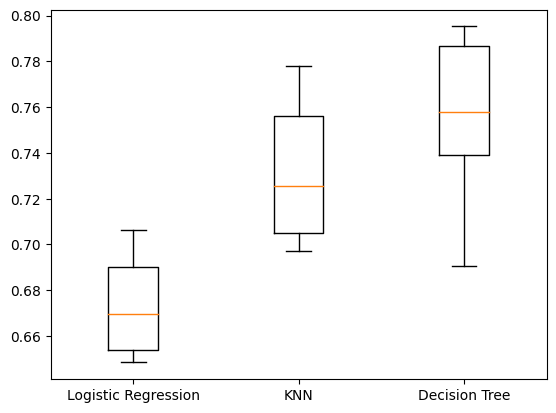

In [56]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
X = crops[final_features ]
y = crops["crop"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(), "KNN":KNeighborsClassifier(),
					"Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():
		kf = KFold(n_splits=6, random_state=42, shuffle=True)
		cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
		results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [70]:
from sklearn.metrics import classification_report
for name, model in models.items():
		model.fit(X_train_scaled, y_train)
		test_score = model.score(X_test_scaled, y_test)
		print("{} Test Set Accuracy: {}".format(name, test_score))
        
for name, model in models.items():    
        y_pred = model.predict(X_test_scaled)
        model_performance = f1_score(y_test, y_pred, average="weighted")
        print("{} Test Set F1-score: {}".format(name, model_performance))      

Logistic Regression Test Set Accuracy: 0.6590909090909091
KNN Test Set Accuracy: 0.7386363636363636
Decision Tree Test Set Accuracy: 0.7659090909090909
Logistic Regression Test Set F1-score: 0.6475209891596989
KNN Test Set F1-score: 0.7362994255402543
Decision Tree Test Set F1-score: 0.76937978569153
